In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining quick summary helper function

In [55]:
def df_quick_info(df):
    report = pd.DataFrame(columns=['Column', 'Data Type', 'Unique Count', 'Unique Sample', 'Missing Values', 'Missing Percentage', 'Unique Percentage'])
    for column in df.columns:
        data_type = df[column].dtype
        unique_count = df[column].nunique()
        unique_sample = df[column].unique()[:5]
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        unique_percentage = (df[column].nunique() / len(df)) * 100
        report = pd.concat([report, pd.DataFrame({'Column': [column],
                                                      'Data Type': [data_type],
                                                      'Unique Count': [unique_count],
                                                      'Unique Sample': [unique_sample],
                                                      'Missing Values': [missing_values],
                                                      'Missing Percentage': [missing_percentage.round(4)],
                                                      'Unique Percentage': [unique_percentage]})],
                            ignore_index=True)
    return report

# Collecting Data

In [56]:
import os

def read_csv_files_in_folder(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            dataframe_name = os.path.splitext(filename)[0]
            dataframes[dataframe_name] = pd.read_csv(file_path, parse_dates=True)
    return dataframes

folder_path = "datasets"
csv_dataframes = read_csv_files_in_folder(folder_path)


for df_name, df in csv_dataframes.items():
    print(df_name)
  

inventory
products
sales
stores


In [57]:
inventory = csv_dataframes['inventory']
products = csv_dataframes['products']
sales = csv_dataframes['sales']
stores = csv_dataframes['stores']

In [58]:
for df_name, df in csv_dataframes.items():
    print(df_name)
    display(df.head(5))

inventory


,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0


products


,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


sales


,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


stores


,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


In [59]:
for df_name, df in csv_dataframes.items():
    print(df_name)
    display(df_quick_info(df))

inventory


,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,Store_ID,int64,50,"[1, 2, 3, 4, 5]",0,0.0,3.138732
1,Product_ID,int64,35,"[1, 2, 3, 4, 5]",0,0.0,2.197112
2,Stock_On_Hand,int64,93,"[27, 0, 32, 6, 79]",0,0.0,5.838041


products


,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,Product_ID,int64,35,"[1, 2, 3, 4, 5]",0,0.0,100.000000
1,Product_Name,object,35,"[Action Figure, Animal Figures, Barrel O' Slim...",0,0.0,100.000000
2,Product_Category,object,5,"[Toys, Art & Crafts, Games, Electronics, Sport...",0,0.0,14.285714
3,Product_Cost,object,16,"[$9.99 , $1.99 , $7.99 , $6.99 , $11.99 ]",0,0.0,45.714286
4,Product_Price,object,18,"[$15.99 , $12.99 , $3.99 , $9.99 , $14.99 ]",0,0.0,51.428571


sales


,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,Sale_ID,int64,829262,"[1, 2, 3, 4, 5]",0,0.0,100.000000
1,Date,object,638,"[2017-01-01, 2017-01-02, 2017-01-03, 2017-01-0...",0,0.0,0.076936
2,Store_ID,int64,50,"[24, 28, 6, 48, 44]",0,0.0,0.006029
3,Product_ID,int64,35,"[4, 1, 8, 7, 18]",0,0.0,0.004221
4,Units,int64,27,"[1, 2, 3, 4, 5]",0,0.0,0.003256


stores


,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,Store_ID,int64,50,"[1, 2, 3, 4, 5]",0,0.0,100.0
1,Store_Name,object,50,"[Maven Toys Guadalajara 1, Maven Toys Monterre...",0,0.0,100.0
2,Store_City,object,29,"[Guadalajara, Monterrey, Saltillo, La Paz, Mex...",0,0.0,58.0
3,Store_Location,object,4,"[Residential, Commercial, Downtown, Airport]",0,0.0,8.0
4,Store_Open_Date,object,50,"[1992-09-18, 1995-04-27, 1999-12-27, 2000-01-0...",0,0.0,100.0


# Need to restore datatypes

In [60]:
# removing dollar signs and making a float

for col in ['Product_Cost', 'Product_Price']:
    products[col] = products[col].str.replace('$', '').astype('float')

# making dates

sales['Date'] = pd.to_datetime(sales.Date).dt.floor('D')
stores['Store_Open_Date'] = pd.to_datetime(stores.Store_Open_Date).dt.strftime('%d-%m-%Y')

C:\Users\Oleh\AppData\Local\Temp\ipykernel_4304\3524730826.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  products[col] = products[col].str.replace('$', '').astype('float')


# Data Consistency
As we can see there are no missing values in any of 4 tables.

# Out of 4 tables we have:
2 fact tables Inventory and Sales
2 Dimension tables Store and Products

For now we can merge them into 2 tables Sales_full and Inventory_full

In [61]:
inventory_full = pd.merge((pd.merge(inventory, products, left_on='Product_ID', right_on='Product_ID', how='left')),stores, left_on='Store_ID', right_on='Store_ID', how='left')

inventory_full.head(5)

,Store_ID,Product_ID,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,1,27,Action Figure,Toys,9.99,15.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992
1,1,2,0,Animal Figures,Toys,9.99,12.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992
2,1,3,32,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992
3,1,4,6,Chutes & Ladders,Games,9.99,12.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992
4,1,5,0,Classic Dominoes,Games,7.99,9.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992


In [62]:
sales_full = pd.merge((pd.merge(sales, products, left_on='Product_ID', right_on='Product_ID', how='left')),stores, left_on='Store_ID', right_on='Store_ID', how='left')

sales_full.head(5)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,31-07-2010
1,2,2017-01-01,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,01-04-2011
2,3,2017-01-01,6,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,13-12-2003
3,4,2017-01-01,48,7,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,23-03-2016
4,5,2017-01-01,44,18,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,27-12-2014


In [63]:
for df in [inventory_full, sales_full]:
    print(df.shape)
    display(df_quick_info(df))

(1593, 11)


,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,Store_ID,int64,50,"[1, 2, 3, 4, 5]",0,0.0,3.138732
1,Product_ID,int64,35,"[1, 2, 3, 4, 5]",0,0.0,2.197112
2,Stock_On_Hand,int64,93,"[27, 0, 32, 6, 79]",0,0.0,5.838041
3,Product_Name,object,35,"[Action Figure, Animal Figures, Barrel O' Slim...",0,0.0,2.197112
4,Product_Category,object,5,"[Toys, Art & Crafts, Games, Electronics, Sport...",0,0.0,0.313873
5,Product_Cost,float64,16,"[9.99, 1.99, 7.99, 6.99, 11.99]",0,0.0,1.004394
6,Product_Price,float64,18,"[15.99, 12.99, 3.99, 9.99, 14.99]",0,0.0,1.129944
7,Store_Name,object,50,"[Maven Toys Guadalajara 1, Maven Toys Monterre...",0,0.0,3.138732
8,Store_City,object,29,"[Guadalajara, Monterrey, Saltillo, La Paz, Mex...",0,0.0,1.820465
9,Store_Location,object,4,"[Residential, Commercial, Downtown, Airport]",0,0.0,0.251099


(829262, 13)


,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage,Unique Percentage
0,Sale_ID,int64,829262,"[1, 2, 3, 4, 5]",0,0.0,100.000000
1,Date,datetime64[ns],638,"[2017-01-01T00:00:00.000000000, 2017-01-02T00:...",0,0.0,0.076936
2,Store_ID,int64,50,"[24, 28, 6, 48, 44]",0,0.0,0.006029
3,Product_ID,int64,35,"[4, 1, 8, 7, 18]",0,0.0,0.004221
4,Units,int64,27,"[1, 2, 3, 4, 5]",0,0.0,0.003256
5,Product_Name,object,35,"[Chutes & Ladders, Action Figure, Deck Of Card...",0,0.0,0.004221
6,Product_Category,object,5,"[Games, Toys, Sports & Outdoors, Art & Crafts,...",0,0.0,0.000603
7,Product_Cost,float64,16,"[9.99, 3.99, 11.99, 34.99, 7.99]",0,0.0,0.001929
8,Product_Price,float64,18,"[12.99, 15.99, 6.99, 39.99, 8.99]",0,0.0,0.002171
9,Store_Name,object,50,"[Maven Toys Aguascalientes 1, Maven Toys Puebl...",0,0.0,0.006029


# Descriptive summaries

In [64]:
print("Number of unique stores is {}".format(stores.Store_ID.nunique()))
print("Number of unique products is {}".format(products.Product_ID.nunique()))
print("Number of unique product categories is {}".format(products.Product_Category.nunique()))
print("Sales data between {} and {}".format(sales.Date.min().strftime('%d-%m-%Y'), sales.Date.max().strftime('%d-%m-%Y')))

Number of unique stores is 50
Number of unique products is 35
Number of unique product categories is 5
Sales data between 01-01-2017 and 30-09-2018


Mean is 10.25, Minimum is 1.99, Maximum is 34.99


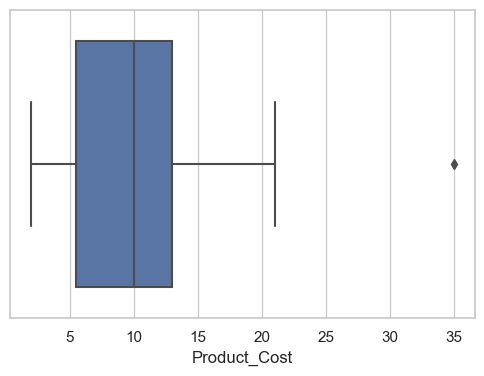

Mean is 14.76, Minimum is 2.99, Maximum is 39.99


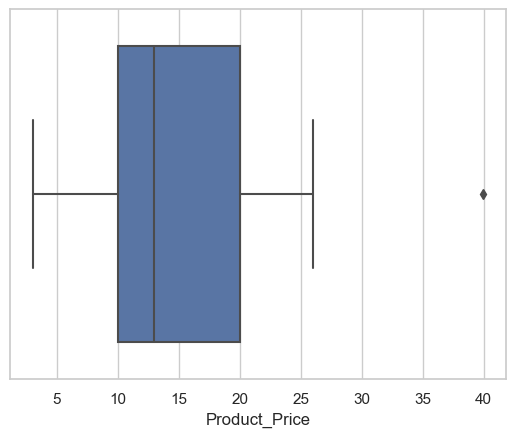

In [65]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
for i in ['Product_Cost', 'Product_Price']:
    sns.boxplot(x=products[i])
    print('Mean is {}, Minimum is {}, Maximum is {}'.format(round(products[i].mean(),2), products[i].min(), products[i].max()))
    plt.show()

# Sales Analysis - Locations and Categories

First let's add a revenue and cost columns

❗❗❗Disclaimer - the prices are constant and this analysis is not showing discounts and price change overtime as it's not connected to transactions themselves

In [66]:
sales_full.sample(5)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
177085,177086,2017-06-13,29,15,1,Hot Wheels 5-Pack,Toys,3.99,5.99,Maven Toys Xalapa 1,Xalapa,Commercial,21-06-2011
246273,246274,2017-08-13,17,16,1,Jenga,Games,2.99,9.99,Maven Toys Toluca 1,Toluca,Downtown,09-12-2007
159275,159276,2017-05-29,31,27,1,PlayDoh Toolkit,Art & Crafts,3.99,4.99,Maven Toys Ciudad de Mexico 2,Cuidad de Mexico,Airport,04-05-2012
1533,1534,2017-01-02,32,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Hermosillo 1,Hermosillo,Residential,31-08-2012
176231,176232,2017-06-12,19,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Puebla 1,Puebla,Commercial,16-12-2008


In [67]:
sales_full['Revenue'] = sales_full.Units + sales_full.Product_Price
sales_full['COGS'] = sales_full.Units + sales_full.Product_Cost
sales_full['Profit'] = sales_full.Revenue - sales_full.COGS
sales_full['Margin%'] = round((sales_full.Profit / sales_full.Revenue) *100,2)

sales_full.sample(5)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Revenue,COGS,Profit,Margin%
441927,441928,2018-01-15,34,3,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Villahermosa 1,Villahermosa,Downtown,07-06-2013,4.99,2.99,2.0,40.08
91603,91604,2017-04-02,7,6,1,Colorbuds,Electronics,6.99,14.99,Maven Toys Monterrey 2,Monterrey,Downtown,25-12-2003,15.99,7.99,8.0,50.03
555185,555186,2018-04-01,36,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Morelia 1,Morelia,Downtown,01-07-2013,7.99,4.99,3.0,37.55
639755,639756,2018-05-25,5,9,3,Dino Egg,Toys,9.99,10.99,Maven Toys La Paz 1,La Paz,Downtown,31-05-2001,13.99,12.99,1.0,7.15
816407,816408,2018-09-22,13,3,1,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Mexicali 2,Mexicali,Downtown,30-08-2006,4.99,2.99,2.0,40.08


In [68]:
revenue_category = pd.DataFrame(sales_full.groupby('Product_Category').agg({'Revenue':np.sum, 'COGS':np.sum, 'Profit': np.sum})).reset_index().sort_values('Profit', ascending=False)
revenue_category['Margin%'] = round(((revenue_category['Revenue']-revenue_category['COGS'])/revenue_category['Revenue'])*100,2)

revenue_category

,Product_Category,Revenue,COGS,Profit,Margin%
4,Toys,4443903.73,3539268.73,904635.0,20.36
1,Electronics,1827151.75,1097519.75,729632.0,39.93
0,Art & Crafts,2317421.27,1759219.27,558202.0,24.09
2,Games,2006372.94,1469135.94,537237.0,26.78
3,Sports & Outdoors,1916582.69,1498520.69,418062.0,21.81


In [69]:
revenue_location = pd.DataFrame(sales_full.groupby(['Store_Location', 'Product_Category']).agg({'Revenue':np.sum, 'COGS':np.sum, 'Profit':np.sum})).reset_index()
revenue_location['Margin%'] = round(((revenue_location['Revenue']-revenue_location['COGS'])/revenue_location['Revenue'])*100,2)

display(revenue_location)

# Finding the indices of the maximum revenue for each location
max_revenue_indices = revenue_location.groupby('Store_Location')['Profit'].idxmax()

max_revenue_categories = revenue_location.loc[max_revenue_indices]

display(max_revenue_categories)

,Store_Location,Product_Category,Revenue,COGS,Profit,Margin%
0,Airport,Art & Crafts,180108.63,134857.63,45251.0,25.12
1,Airport,Electronics,169059.22,100857.22,68202.0,40.34
2,Airport,Games,188198.18,134260.18,53938.0,28.66
3,Airport,Sports & Outdoors,159357.67,127798.67,31559.0,19.80
4,Airport,Toys,351307.73,279382.73,71925.0,20.47
5,Commercial,Art & Crafts,504536.86,386331.86,118205.0,23.43
6,Commercial,Electronics,499696.87,298072.87,201624.0,40.35
7,Commercial,Games,446023.23,322702.23,123321.0,27.65
8,Commercial,Sports & Outdoors,431393.52,337566.52,93827.0,21.75
9,Commercial,Toys,946501.47,757117.47,189384.0,20.01


,Store_Location,Product_Category,Revenue,COGS,Profit,Margin%
4,Airport,Toys,351307.73,279382.73,71925.0,20.47
6,Commercial,Electronics,499696.87,298072.87,201624.0,40.35
14,Downtown,Toys,2597760.86,2066484.86,531276.0,20.45
19,Residential,Toys,548333.67,436283.67,112050.0,20.43


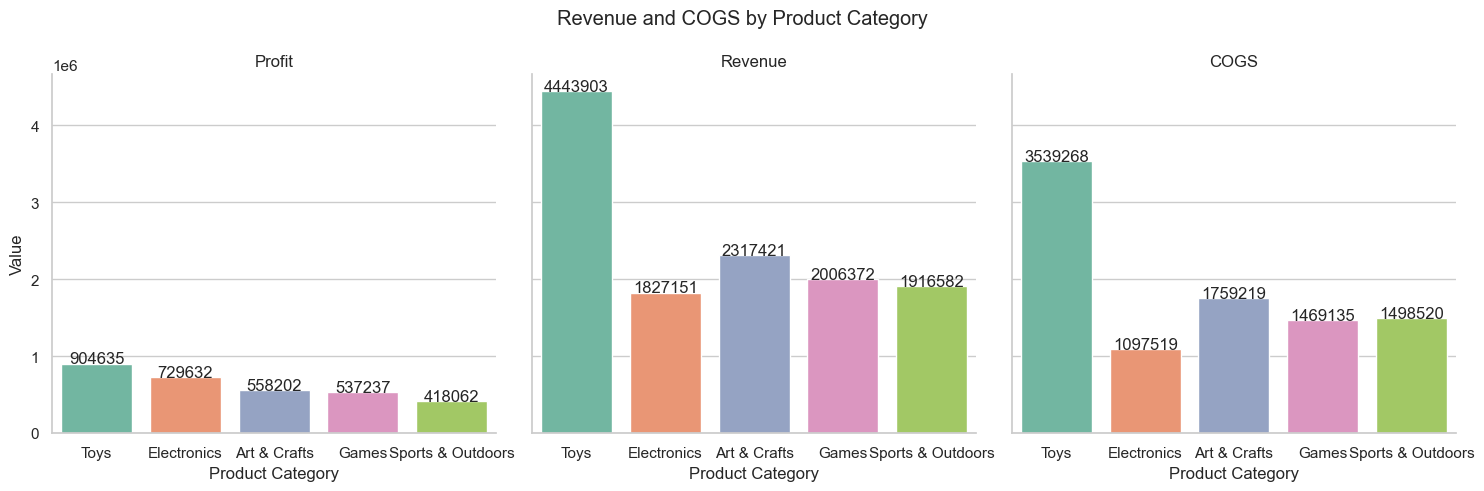

In [70]:
melted_data = pd.melt(revenue_category, id_vars='Product_Category', value_vars=['Profit', 'Revenue', 'COGS'], var_name='Metric', value_name='Value')

# Create a FacetGrid with two bar plots
g = sns.FacetGrid(melted_data, col='Metric', height=5)
g.map_dataframe(sns.barplot, x='Product_Category', y='Value', palette='Set2')
g.set_axis_labels('Product Category', 'Value')
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Revenue and COGS by Product Category')

for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha="center")


plt.show()


In [71]:
melted_data

,Product_Category,Metric,Value
0,Toys,Profit,904635.00
1,Electronics,Profit,729632.00
2,Art & Crafts,Profit,558202.00
3,Games,Profit,537237.00
4,Sports & Outdoors,Profit,418062.00
5,Toys,Revenue,4443903.73
6,Electronics,Revenue,1827151.75
7,Art & Crafts,Revenue,2317421.27
8,Games,Revenue,2006372.94
9,Sports & Outdoors,Revenue,1916582.69


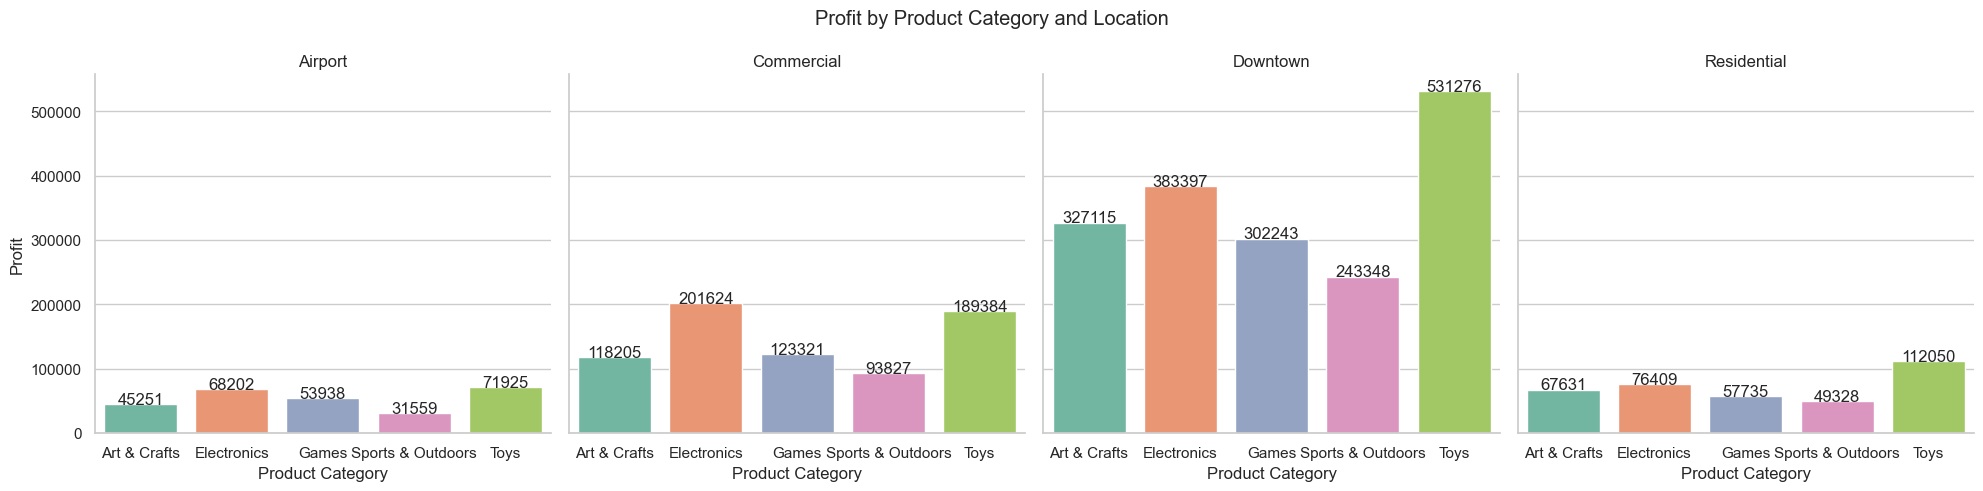

In [72]:
g = sns.FacetGrid(revenue_location, col='Store_Location', height=5)
g.map_dataframe(sns.barplot, x='Product_Category', y='Profit', palette='Set2')
g.set_axis_labels('Product Category', 'Profit')
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Profit by Product Category and Location')

for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha="center")

As we can see - Toys category brings the most revenue on country level, but in commercial location it's Electronics.

# Defining seasonality in sales

In [73]:
# adding a year/month column to define monthly seasonality
sales_full['Year/Month'] = sales_full.Date.dt.strftime('%Y/%m')

sales_full.head(5)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Revenue,COGS,Profit,Margin%,Year/Month
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,31-07-2010,13.99,10.99,3.0,21.44,2017/01
1,2,2017-01-01,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,01-04-2011,16.99,10.99,6.0,35.31,2017/01
2,3,2017-01-01,6,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,13-12-2003,7.99,4.99,3.0,37.55,2017/01
3,4,2017-01-01,48,7,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,23-03-2016,16.99,12.99,4.0,23.54,2017/01
4,5,2017-01-01,44,18,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,27-12-2014,40.99,35.99,5.0,12.20,2017/01


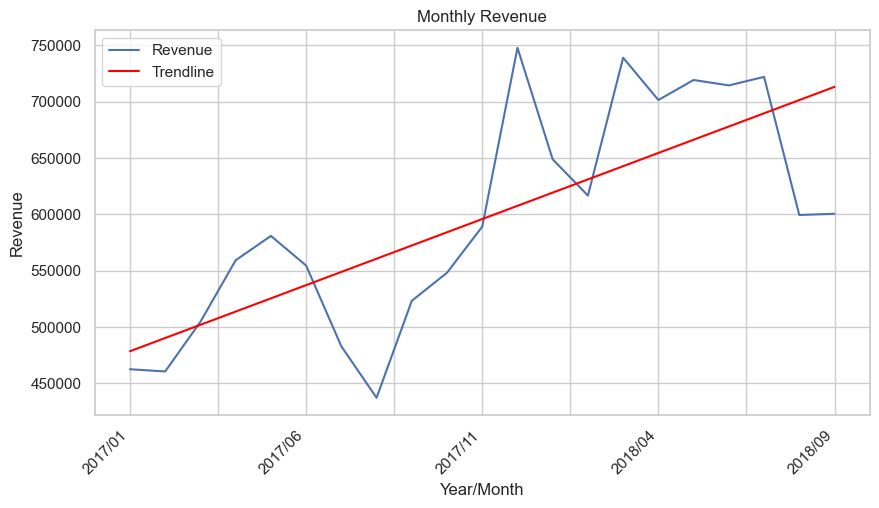

In [74]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 5))
sales_full.groupby('Year/Month')['Revenue'].sum().plot()
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year/Month')  # Add x-axis label
plt.ylabel('Revenue')  # Add y-axis label
plt.title('Monthly Revenue')  # Add plot title

# Adding a trendline
unique_months = sales_full['Year/Month'].unique()
x_values = np.arange(len(unique_months))
y_values = sales_full.groupby('Year/Month')['Revenue'].sum()

# Reshape the x_values array to a 2D array for sklearn
x_values_reshaped = x_values.reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(x_values_reshaped, y_values)

trendline = regressor.predict(x_values_reshaped)
plt.plot(unique_months, trendline, label='Trendline', color='red')

plt.legend()  # Display legend


There is not enough data to define the seasonality on monthly level, assumptions can be wrong.

what is visible is that total revenue was falling drastically in 3rd qtr of 2017 and in the beginning of 2018 and Sept 2018.

It may be that 1st and 3rd qtrs are the low season

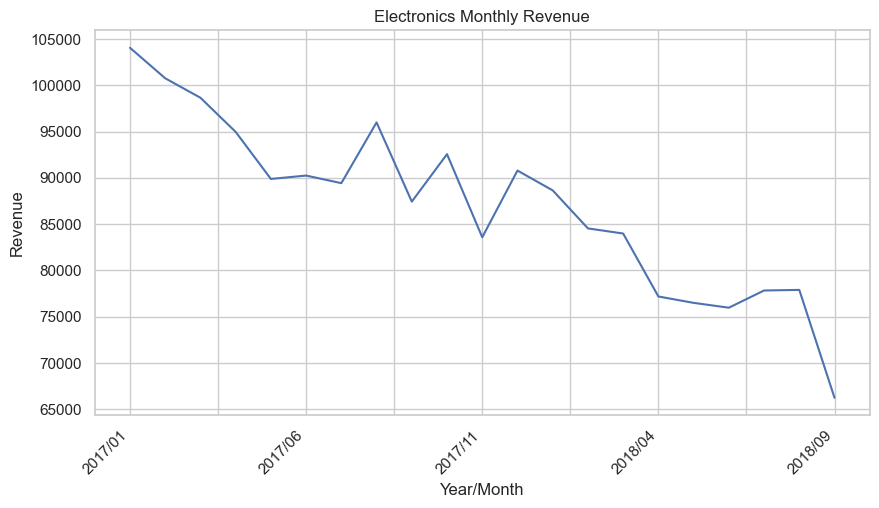

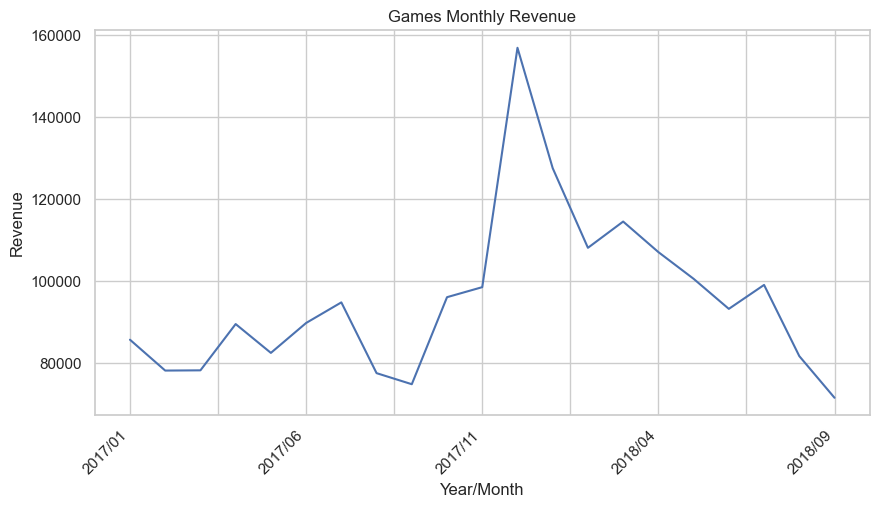

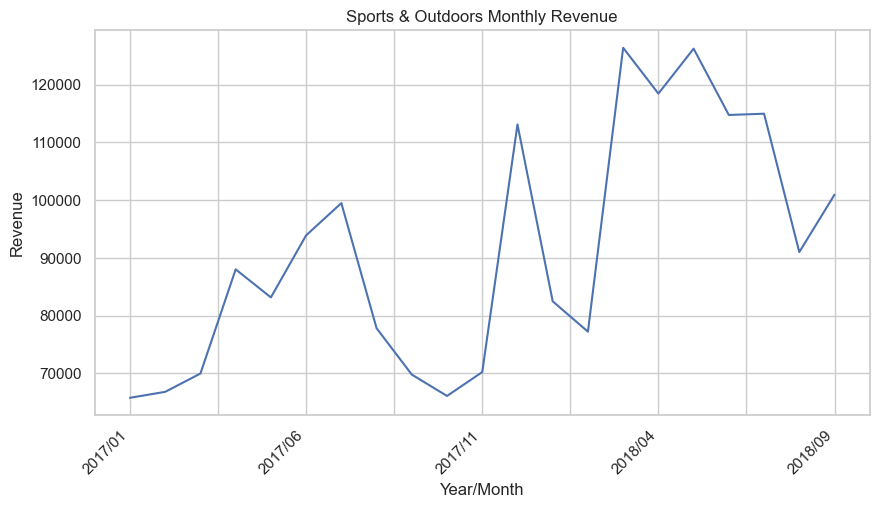

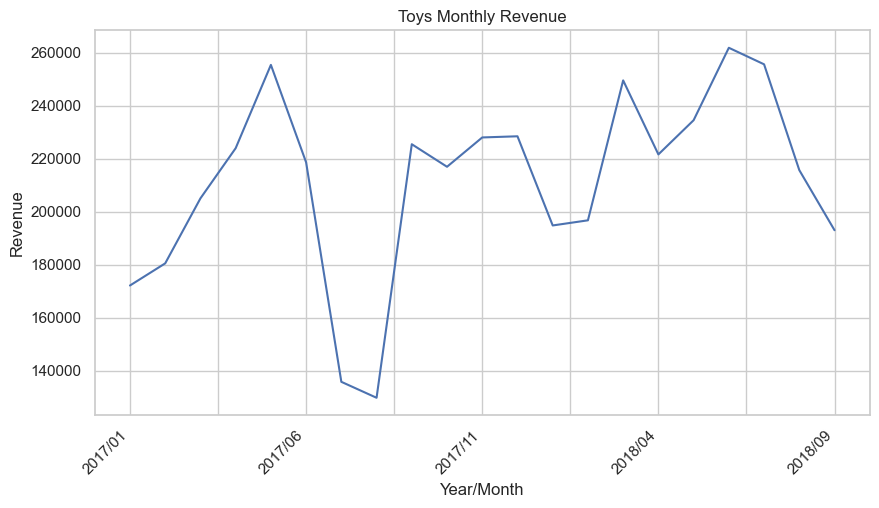

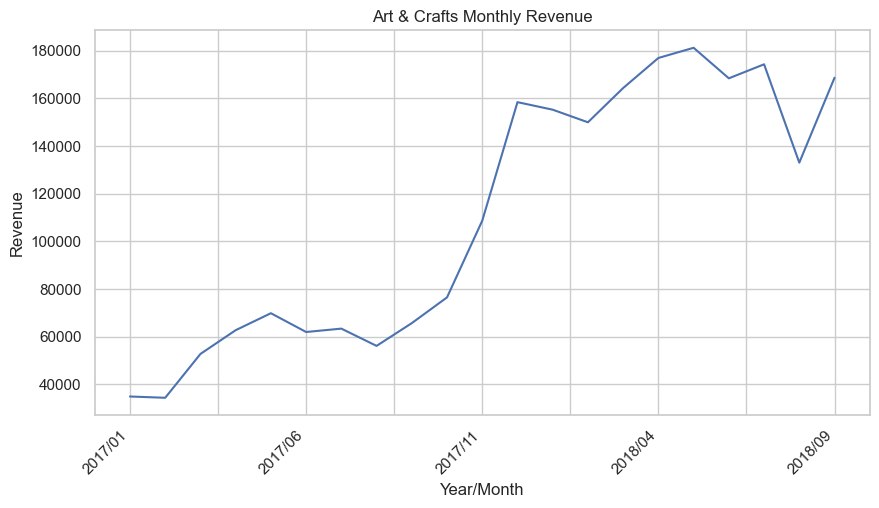

In [75]:
for pc in set(sales_full['Product_Category']):
    plt.figure(figsize=(10, 5))
    sales_full[sales_full['Product_Category']==pc].groupby('Year/Month')['Revenue'].sum().plot()
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Year/Month')  # Add x-axis label
    plt.ylabel('Revenue')  # Add y-axis label
    plt.title(pc+' Monthly Revenue')
    plt.show()

on a product group level it's visible that for toys, S&O we have sales drop in qtr 3 and 1

electronics tends to go down constantly, A&C - vice versa,

Games trend remains the same but fluctates and has a peak

# Sales vs Stocks

In [76]:
#checking how many items we do not have in stock

inventory_full['Is_in_Stock'] = inventory_full['Stock_On_Hand'].apply(lambda x: 1 if x > 0 else 0)

In [77]:
inventory_full.groupby(['Store_Location']).agg({'Is_in_Stock':[np.sum, np.size]})

Is_in_Stock     
                       sum size
Store_Location                 
Airport                 91   93
Commercial             375  390
Downtown               879  925
Residential            171  185

we have items (not many) which are currently not in stock - let's assume they are problematic and we don't have them often in particular locations

then we will need to combine inventory and sales tables to find the correlation

In [78]:
df_merged = pd.merge(sales_full, inventory_full, on=['Store_ID', 'Product_ID'], how='inner').reset_index()

In [79]:
print(len(df_merged)/ len(sales_full))


0.9924848841500032


In [80]:
cols_to_del = [v for v in df_merged.columns if v.endswith('_y')]

df_merged.drop(columns=cols_to_del, inplace=True)

In [81]:
df_merged

,index,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name_x,Product_Category_x,Product_Cost_x,Product_Price_x,...,Store_City_x,Store_Location_x,Store_Open_Date_x,Revenue,COGS,Profit,Margin%,Year/Month,Stock_On_Hand,Is_in_Stock
0,0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,...,Aguascalientes,Downtown,31-07-2010,13.99,10.99,3.0,21.44,2017/01,1,1
1,1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,...,Aguascalientes,Downtown,31-07-2010,13.99,10.99,3.0,21.44,2017/01,1,1
2,2,98,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,...,Aguascalientes,Downtown,31-07-2010,13.99,10.99,3.0,21.44,2017/01,1,1
3,3,128,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,...,Aguascalientes,Downtown,31-07-2010,13.99,10.99,3.0,21.44,2017/01,1,1
4,4,146,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,...,Aguascalientes,Downtown,31-07-2010,13.99,10.99,3.0,21.44,2017/01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823025,823025,822467,2018-09-27,36,28,1,Playfoam,Art & Crafts,3.99,10.99,...,Morelia,Downtown,01-07-2013,11.99,4.99,7.0,58.38,2018/09,7,1
823026,823026,822773,2018-09-27,36,28,1,Playfoam,Art & Crafts,3.99,10.99,...,Morelia,Downtown,01-07-2013,11.99,4.99,7.0,58.38,2018/09,7,1
823027,823027,822887,2018-09-27,36,28,1,Playfoam,Art & Crafts,3.99,10.99,...,Morelia,Downtown,01-07-2013,11.99,4.99,7.0,58.38,2018/09,7,1
823028,823028,822984,2018-09-27,36,28,1,Playfoam,Art & Crafts,3.99,10.99,...,Morelia,Downtown,01-07-2013,11.99,4.99,7.0,58.38,2018/09,7,1


<Axes: title={'center': 'Avg Revenue per 1 sale'}, ylabel='Is_in_Stock'>

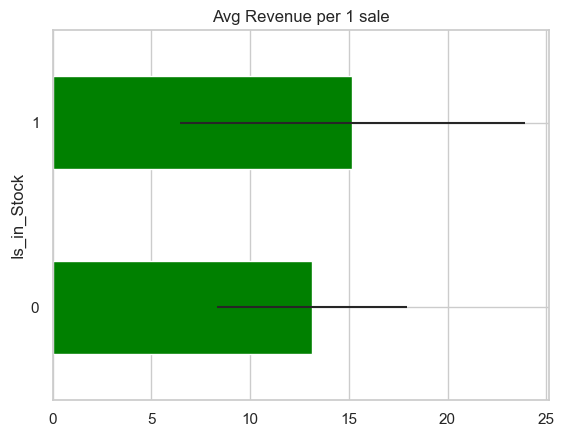

In [82]:
#lets find out overage revenue for the items with stock vs average revenue to the items out of stock

df_merged.groupby('Is_in_Stock')['Revenue'].agg(['mean', 'std']).plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Avg Revenue per 1 sale", color='green')

as we can see average revenue per 1 sales is slightly higher (but not that much) for the items in stock. STD is also wider of course. So it's likely some revenue could be lost

# Inventory frozen funds

In [83]:
inventory_full

,Store_ID,Product_ID,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Is_in_Stock
0,1,1,27,Action Figure,Toys,9.99,15.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,1
1,1,2,0,Animal Figures,Toys,9.99,12.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,0
2,1,3,32,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,1
3,1,4,6,Chutes & Ladders,Games,9.99,12.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,1
4,1,5,0,Classic Dominoes,Games,7.99,9.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1588,50,31,18,Splash Balls,Sports & Outdoors,7.99,8.99,Maven Toys Guanajuato 3,Guanajuato,Residential,18-05-2016,1
1589,50,32,9,Supersoaker Water Gun,Sports & Outdoors,11.99,14.99,Maven Toys Guanajuato 3,Guanajuato,Residential,18-05-2016,1
1590,50,33,1,Teddy Bear,Toys,10.99,12.99,Maven Toys Guanajuato 3,Guanajuato,Residential,18-05-2016,1
1591,50,34,17,Toy Robot,Electronics,20.99,25.99,Maven Toys Guanajuato 3,Guanajuato,Residential,18-05-2016,1


In [84]:
# let's calculate tje cost of the inventory

inventory_full['Total_Cost'] = inventory_full.Product_Cost*inventory_full.Stock_On_Hand

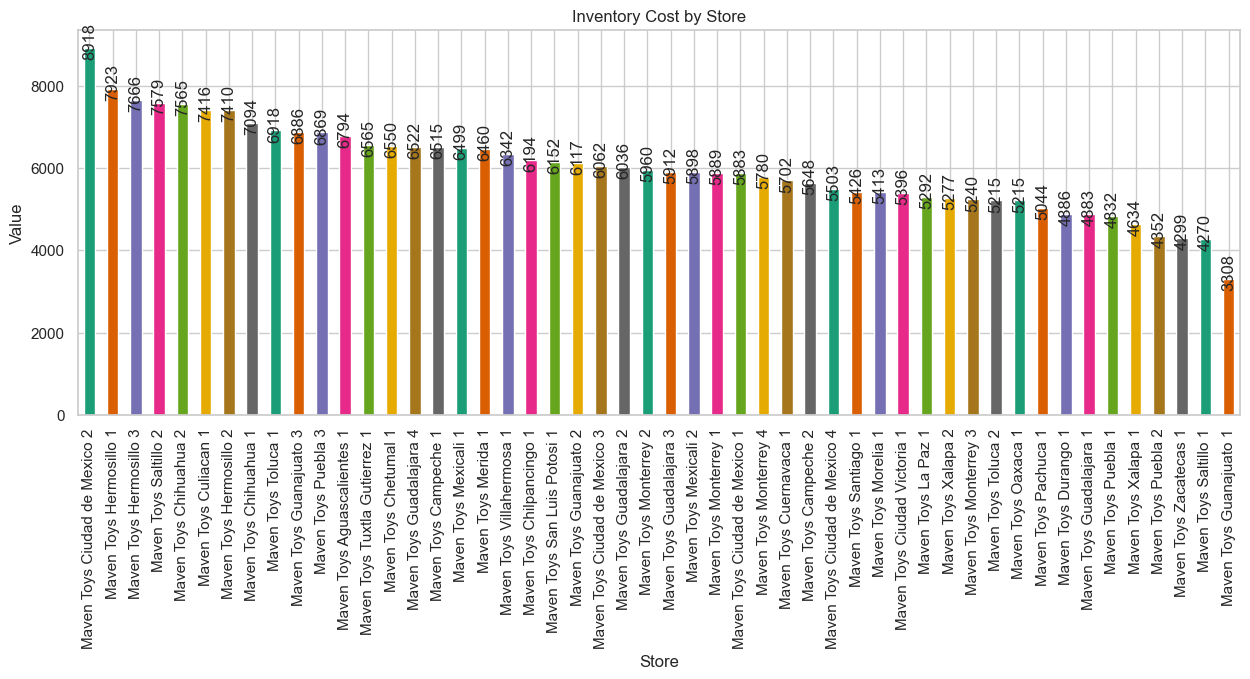

In [85]:
#let's show it by store

palette = sns.color_palette("Dark2")
plt.figure(figsize=(15,5))
ax = inventory_full.groupby('Store_Name')['Total_Cost'].sum().sort_values(ascending=False).plot(kind='bar', color=palette )
plt.title('Inventory Cost by Store')
plt.xlabel('Store')
plt.ylabel('Value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points', rotation=90)

In [86]:
#let's define average montly sales units by item and store

monthly_sales = pd.DataFrame(sales_full.groupby(['Year/Month','Store_ID', 'Product_ID'])['Units'].sum()).reset_index().groupby(['Store_ID', 'Product_ID'])['Units'].mean()

monthly_sales.head(5)

Store_ID  Product_ID
1         1              60.095238
          2              31.650000
          3             119.142857
          4               7.800000
          5              17.230769
Name: Units, dtype: float64

In [87]:
inventory_full = pd.merge(inventory_full, monthly_sales, on=['Store_ID', 'Product_ID'], how = 'inner').rename(columns={'Units': 'AVG_Monthly_Sales'})

inventory_full['Months_of_sales'] = inventory_full['Stock_On_Hand'] / inventory_full['AVG_Monthly_Sales']

In [88]:
inventory_full

,Store_ID,Product_ID,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Is_in_Stock,Total_Cost,AVG_Monthly_Sales,Months_of_sales
0,1,1,27,Action Figure,Toys,9.99,15.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,1,269.73,60.095238,0.449287
1,1,2,0,Animal Figures,Toys,9.99,12.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,0,0.00,31.650000,0.000000
2,1,3,32,Barrel O' Slime,Art & Crafts,1.99,3.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,1,63.68,119.142857,0.268585
3,1,4,6,Chutes & Ladders,Games,9.99,12.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,1,59.94,7.800000,0.769231
4,1,5,0,Classic Dominoes,Games,7.99,9.99,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,0,0.00,17.230769,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,50,31,18,Splash Balls,Sports & Outdoors,7.99,8.99,Maven Toys Guanajuato 3,Guanajuato,Residential,18-05-2016,1,143.82,63.250000,0.284585
1586,50,32,9,Supersoaker Water Gun,Sports & Outdoors,11.99,14.99,Maven Toys Guanajuato 3,Guanajuato,Residential,18-05-2016,1,107.91,16.363636,0.550000
1587,50,33,1,Teddy Bear,Toys,10.99,12.99,Maven Toys Guanajuato 3,Guanajuato,Residential,18-05-2016,1,10.99,10.000000,0.100000
1588,50,34,17,Toy Robot,Electronics,20.99,25.99,Maven Toys Guanajuato 3,Guanajuato,Residential,18-05-2016,1,356.83,10.600000,1.603774


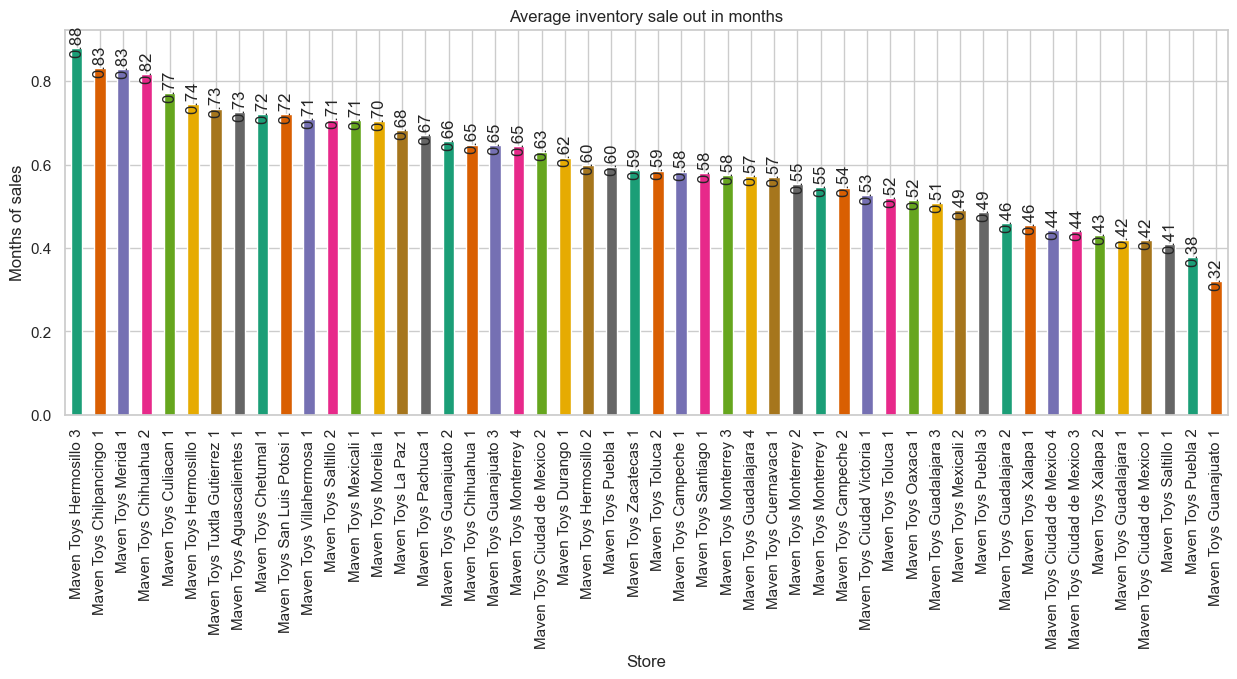

In [89]:
#let's show average leftover in sales by store

palette = sns.color_palette("Dark2")
plt.figure(figsize=(15,5))
ax = inventory_full.groupby('Store_Name')['Months_of_sales'].mean().sort_values(ascending=False).plot(kind='bar', color=palette )
plt.title('Average inventory sale out in months')
plt.xlabel('Store')
plt.ylabel('Months of sales')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points', rotation=90)

if we do not replenish the stores and leave as it is - most of items can be sold and funds will be freed up in less then 1 month for each of them

# Additional Visualizations

In [90]:
from matplotlib.gridspec import GridSpec
sns.set_style('whitegrid')
colors = sns.color_palette("Dark2")

In [91]:
import datetime as dt

today = dt.datetime.now()

stores['Years_Open'] = pd.to_datetime(stores.Store_Open_Date).apply(lambda x: round((today - x).days/365,0)).astype('int')

stores.head(5)

C:\Users\Oleh\AppData\Local\Temp\ipykernel_4304\3047572168.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  stores['Years_Open'] = pd.to_datetime(stores.Store_Open_Date).apply(lambda x: round((today - x).days/365,0)).astype('int')


,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Years_Open
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,18-09-1992,31
1,2,Maven Toys Monterrey 1,Monterrey,Residential,27-04-1995,28
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,27-12-1999,24
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,01-01-2000,24
4,5,Maven Toys La Paz 1,La Paz,Downtown,31-05-2001,22


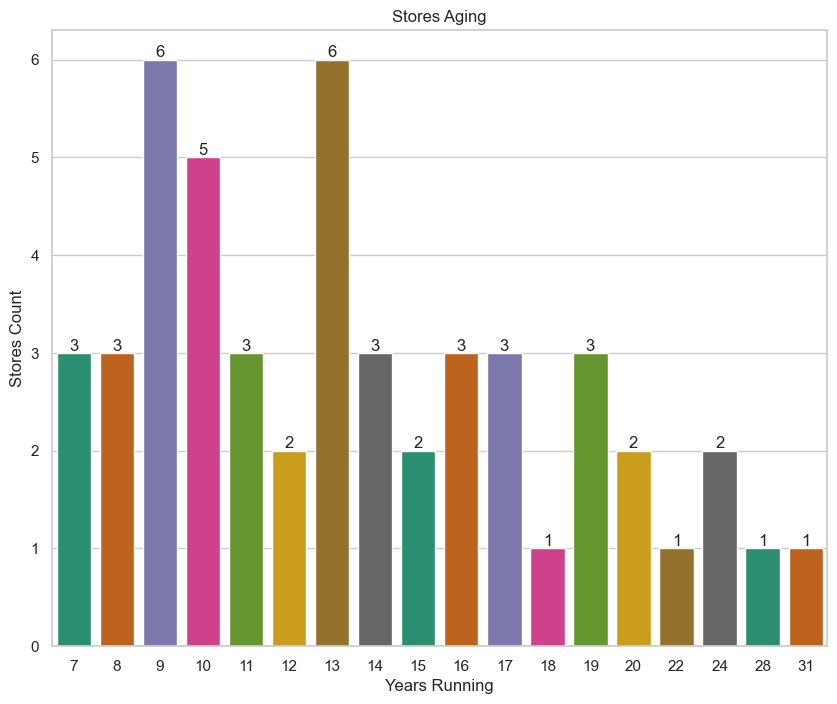

In [92]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = stores.Years_Open, palette=colors)
plt.ylabel('Stores Count')
plt.xlabel('Years Running')
plt.title('Stores Aging')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points', rotation=0)

In [93]:
sales_full.head(1)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Revenue,COGS,Profit,Margin%,Year/Month
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,31-07-2010,13.99,10.99,3.0,21.44,2017/01


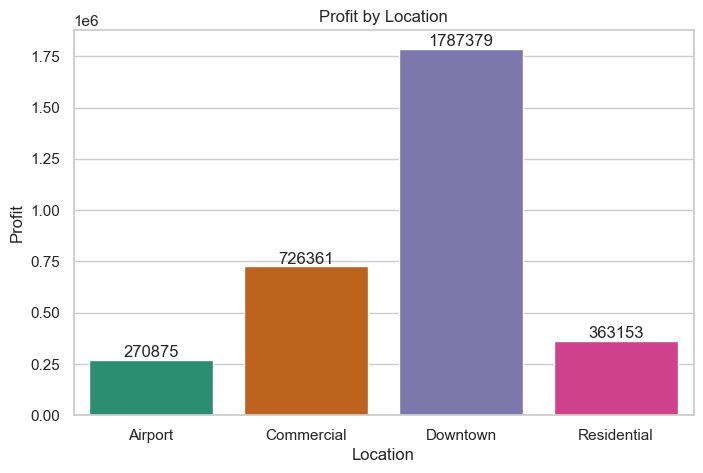

In [94]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Store_Location', y='Profit', data = sales_full.groupby('Store_Location')['Profit'].sum().reset_index(), palette = colors)
plt.ylabel('Profit')
plt.xlabel('Location')
plt.title('Profit by Location')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points', rotation=0)

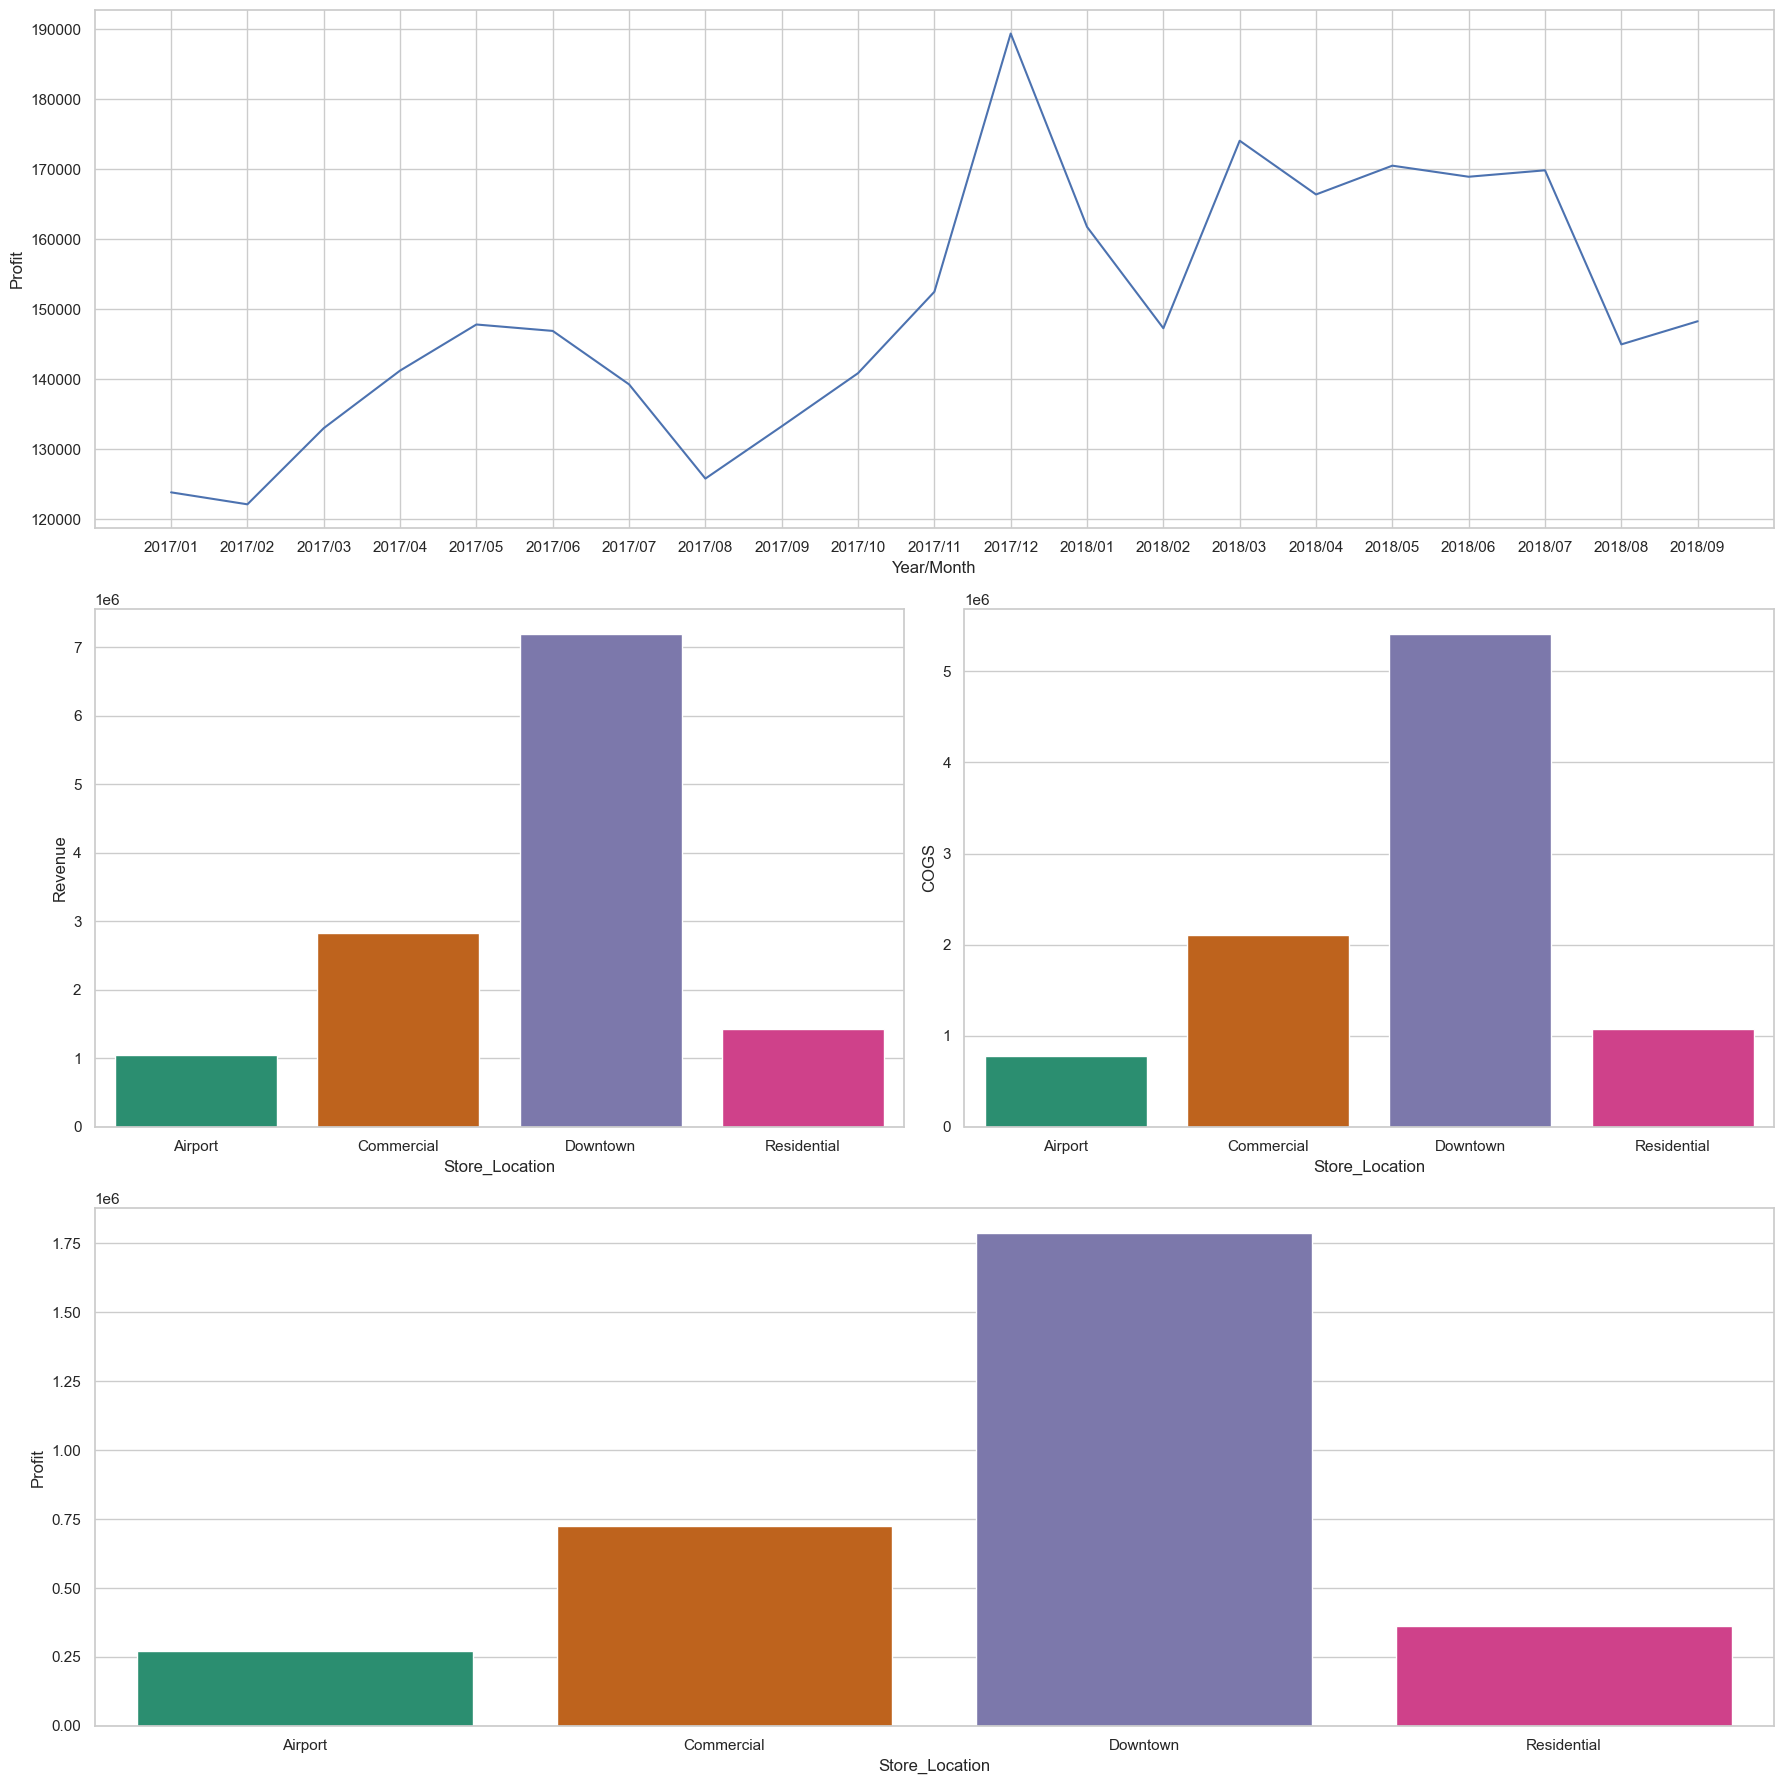

In [95]:
location_sales_summary = sales_full.groupby('Store_Location').agg({'Profit':np.sum, 'Revenue':np.sum, 'COGS':np.sum, 'Margin%':np.mean}).reset_index()

sales_dev = sales_full.groupby('Year/Month')['Profit'].sum().reset_index()

fig = plt.figure(figsize=(18,18))

gs = GridSpec(3, 2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, :])

sns.lineplot(x='Year/Month', y='Profit', data=sales_dev, ax=ax1)
sns.barplot(x='Store_Location', y='Revenue', data=location_sales_summary, palette=colors, ax=ax2)
sns.barplot(x='Store_Location', y='COGS', data=location_sales_summary, palette=colors, ax=ax3)
sns.barplot(x='Store_Location', y='Profit', data=location_sales_summary, palette=colors, ax=ax4)

plt.tight_layout()


<Axes: ylabel='Revenue'>

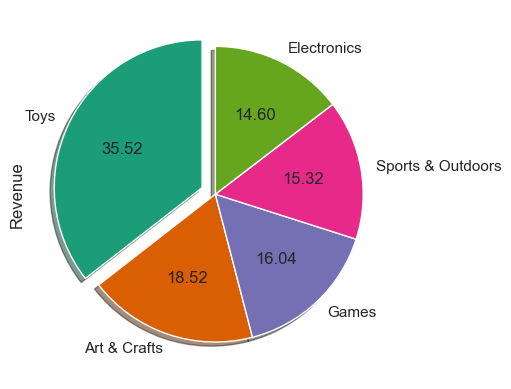

In [98]:
# revenue by product category

sales_full.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False).plot.pie(explode = [0.1, 0,0,0,0], autopct='%.2f', colors=colors, shadow=True, startangle=90, )